In [8]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ
from collections import namedtuple
from DynLinEcon import DLE
from math import sqrt
%matplotlib inline

# Models of occupational choice and pay

### 1. A One-Occupation Model

Ryoo and Rosen's (2004) partial equilibrium model determines a stock of "Engineers" $N_t$; the number of new entrants in engineering school, $n_t$; and the wage level, $w_t$, of engineers. It takes k periods of schooling to become an engineer. The model consists of the following equations: first, a demand curve for engineers:

$$w_t = - \alpha_d N_t + \epsilon_{dt} $$

second, a time-to-build structure of the education process:

$$ N_{t+k} = \delta_N N_{t+k-1} + n_t $$

third, a definition of the discounted present value of each new engineering student:

$$ v_t = \beta_k \mathbb{E} \sum_{j=0}^\infty (\beta \delta_N)^j w_{t+k+j}$$

and fourth, a supply curve of new students driven by $v_t$:

$$n_t = \alpha_s v_t + \epsilon_{st} $$

### Mapping into HS2013 framework

We represent this model in the HS2013 framework by sweeping the time-to-build structure and the demand for engineers into the household technology, and putting the supply of engineers into the technology for producing goods. Specifically:

#### Preferences

$$ \Pi = 0, \Lambda= 
\left[ {\begin{array}{ccccc}
   \alpha_d & 0 & \cdots & 0 
   \end{array} } 
   \right]
, \Delta_h = 
\left[ {\begin{array}{ccccc}
   \delta_N & 1 & 0 & \cdots & 0 \\ 0 & 0 & 1 & \cdots & 0 \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 0 & \cdots& \cdots & 0 & 1 \\ 0 & 0 & 0 & \cdots & 0 
   \end{array} } 
   \right]
   , \Theta_h = 
\left[ {\begin{array}{c}
   0 \\ 0 \\ \vdots \\ 0 \\ 1
   \end{array} } 
   \right] 
$$

(where $\Lambda$ is a k+1 x 1 matrix, $\Delta_h$ is a k_1 x k+1 matrix, and $\Theta_h$ is a k+1 x 1 matrix.)

This specification sets $N_t = h_{1t-1}$, $n_t = c_t$, $h_{\tau+1,t-1} = n_{t-(k-\tau)}$ for $\tau = 1,...,k$. Below we set up the model such that the number of years of education, k, can be varied.

#### Technology

To capture Ryoo and Rosen's supply curve, we use the physical technology:

$$ c_t = i_t + d_{1t} $$
$$ \psi_1i_t = g_t $$

(where $\psi_1$ is inversely proportional to $\alpha_s$)

#### Information

We want to set $b_t = \epsilon_{dt}$ and $d_{1t} = \epsilon_{st} $. Therefore:

$$ A_{22}= 
\left[ {\begin{array}{ccc}
   1 & 0 & 0 \\ 0 & \rho_s & 0 \\ 0 & 0 & \rho_d
   \end{array} } 
   \right]
,   C_2 = 
\left[ {\begin{array}{ccc}
   0 & 0 \\ 1 & 0 \\ 0 & 1
   \end{array} } 
   \right]
,   U_b = 
\left[ {\begin{array}{cccc}
   30 & 0 & 1
   \end{array} } 
   \right]
,   U_d = 
\left[ {\begin{array}{c}
   10 & 1 & 0 \\ 0 & 0 & 0
   \end{array} } 
   \right]
$$

 (where $\rho_s$ and $\rho_d$ describe the persistence of the supply and demand shocks)

In [2]:
Information = namedtuple('Information', ['a22', 'c2','ub','ud'])
Technology = namedtuple('Technology', ['phic','phig','phii','gamma','deltak','thetak'])
Preferences = namedtuple('Preferences', ['beta','llambda','pih','deltah','thetah'])

In this notebook we will study how changing the number of years of education required to become an engineer, and changing the slope of the demand curve, affects the response of the economy to demand shocks.

To begin with, we set $k = 4$ and $\alpha_d = 0.1$.

In [3]:
k = 4 #Number of periods of schooling required to become engineer

beta = np.array([[1/1.05]])
alphad = np.array([[0.1]])
alphas = 1
eps1=.0000001
lam1 = np.ones((1,k))*eps1
llambda = np.hstack((alphad,lam1)) #Use of eps1 is trick to aquire detectability, see HS2013 p. 228 footnote 4
pih = np.array([[0]])

deltan = np.array([[0.95]])
d1 = np.vstack((deltan,np.zeros((k-1,1))))
d2 = np.hstack((d1,np.eye(k)))
deltah = np.vstack((d2, np.zeros((1,k+1))))

thetah = np.vstack((np.zeros((k,1)),np.ones((1,1))))

psi1 = 1/alphas

phic = np.array([[1],[0]])
phig = np.array([[0],[-1]])
phii = np.array([[-1],[psi1]])
gamma = np.array([[0],[0]])

deltak = np.array([[0]])
thetak = np.array([[0]])

rho_s = 0.8
rho_d = 0.8

a22 = np.array([[1,0,0],[0,rho_s,0],[0,0,rho_d]])
c2 = np.array([[0,0],[10,0],[0,10]])
ub = np.array([[30,0,1]])
ud = np.array([[10,1,0],[0,0,0]])

Info1 = Information(a22,c2,ub,ud)
Tech1 = Technology(phic,phig,phii,gamma,deltak,thetak)
Pref1 = Preferences(beta,llambda,pih,deltah,thetah)

Econ1 = DLE(Info1,Tech1,Pref1)

We create three other economies by:

1. Raising $\alpha_d$ to 2
2. Raising k to 7
3. Raising k to 10

In [4]:
alphad = np.array([[2]])
llambda = np.hstack((alphad,lam1))
Pref2 = Preferences(beta,llambda,pih,deltah,thetah)
Econ2 = DLE(Info1,Tech1,Pref2)

alphad = np.array([[0.1]])

k = 7
lam1 = np.ones((1,k))*eps1
llambda = np.hstack((alphad,lam1))
d1 = np.vstack((deltan,np.zeros((k-1,1))))
d2 = np.hstack((d1,np.eye(k)))
deltah = np.vstack((d2, np.zeros((1,k+1))))
thetah = np.vstack((np.zeros((k,1)),np.ones((1,1))))

Pref3 = Preferences(beta,llambda,pih,deltah,thetah)
Econ3 = DLE(Info1,Tech1,Pref3)

k = 10
lam1 = np.ones((1,k))*eps1
llambda = np.hstack((alphad,lam1))
d1 = np.vstack((deltan,np.zeros((k-1,1))))
d2 = np.hstack((d1,np.eye(k)))
deltah = np.vstack((d2, np.zeros((1,k+1))))
thetah = np.vstack((np.zeros((k,1)),np.ones((1,1))))

Pref4 = Preferences(beta,llambda,pih,deltah,thetah)
Econ4 = DLE(Info1,Tech1,Pref4)

In [5]:
shock_demand = np.array([[0],[1]])

Econ1.irf(ts_length=25,shock = shock_demand)
Econ2.irf(ts_length=25,shock = shock_demand)
Econ3.irf(ts_length=25,shock = shock_demand)
Econ4.irf(ts_length=25,shock = shock_demand)

The first figure plots the impulse response of $n_t$ (on the left) and $N_t$ (on the right) to a positive demand shock, for $\alpha_d = 0.1$ and $\alpha_d = 2$.

When $\alpha_d = 2$, the number of new students $n_t$ rises initially, but the response then turns negative. A positive demand shock raises wages, drawing new students into the profession. However, these new students raise $N_t$. The higher is $\alpha_d$, the larger the effect of this rise in $N_t$ on wages. This counteracts the demand shock's positive effect on wages, reducing the number of new students in subsequent periods. Consequently, when $\alpha_d$ is lower, the effect of a demand shock on $N_t$ is larger.

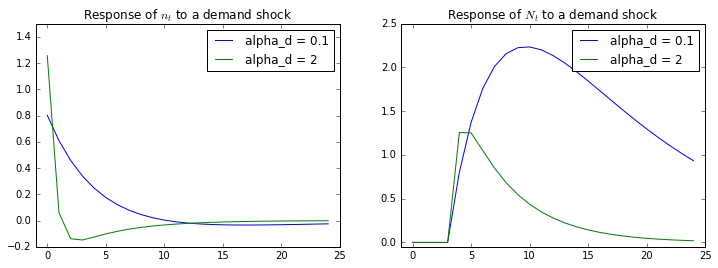

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(Econ1.c_irf,label='alpha_d = 0.1')
plt.plot(Econ2.c_irf,label='alpha_d = 2')
plt.ylim((-0.2,1.5))
plt.xlim((-1,25))
plt.legend(loc='Best')
plt.title('Response of $n_t$ to a demand shock')

plt.subplot(122)
plt.plot(Econ1.h_irf[:,0],label='alpha_d = 0.1')
plt.plot(Econ2.h_irf[:,0],label='alpha_d = 2')
plt.ylim((-0.05,2.5))
plt.xlim((-1,25))
plt.legend(loc='Best')
plt.title('Response of $N_t$ to a demand shock')


The second figure plots the impulse response of $n_t$ (on the left) and $N_t$ (on the right) to a positive demand shock, for $k=4$, $k=7$ and $k=10$ (with $\alpha_d = 0.1$). Both figures show that raising k lowers the effect of a positive demand shock on entry to the profession. 

Increasing the number of periods of schooling that is required lowers the number of new students in response to a demand shock, as new students will benefit less from the impact of that shock on wages.

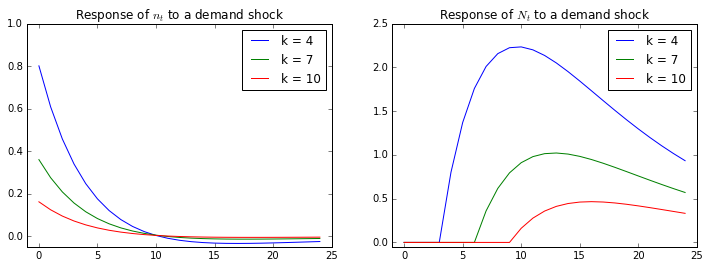

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(Econ1.c_irf,label='k = 4')
plt.plot(Econ3.c_irf,label='k = 7')
plt.plot(Econ4.c_irf,label='k = 10')
plt.ylim((-0.05,1))
plt.xlim((-1,25))
plt.legend(loc='Best')
plt.title('Response of $n_t$ to a demand shock')

plt.subplot(122)
plt.plot(Econ1.h_irf[:,0],label='k = 4')
plt.plot(Econ3.h_irf[:,0],label='k = 7')
plt.plot(Econ4.h_irf[:,0],label='k = 10')
plt.legend(loc='Best')
plt.ylim((-0.05,2.5))
plt.xlim((-1,25))
plt.title('Response of $N_t$ to a demand shock')